In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
results = pd.read_csv('server/results.csv')
results.columns = ['server_id', 'service_id', 'client_id', 'prediction', 'compute_time', 'probability', 'qoe', 'acc_qoe', 'delay_qoe', 'req_acc', 'req_delay', 'model', 'timestamp', 'accuracy', 'ground_truth', 'publish_time', 'total_time']

# Define the model mapping
model_mapping = {
    "550e8400-e29b-41d4-a716-446655440000": "resnet152",
    "550e8400-e29b-41d4-a716-446655440001": "shufflenet_v2_x0_5",
    "550e8400-e29b-41d4-a716-446655440002": "densenet201",
    "550e8400-e29b-41d4-a716-446655440003": "mobilenet_v3_small",
    "550e8400-e29b-41d4-a716-446655440004": "resnext50_32x4d",
    "550e8400-e29b-41d4-a716-446655440005": "googlenet"
}

# Replace model IDs with names
results['model'] = results['model'].replace(model_mapping)

# Convert timestamp to datetime
results['timestamp'] = pd.to_datetime(results['timestamp'])
results

,server_id,service_id,client_id,prediction,compute_time,probability,qoe,acc_qoe,delay_qoe,req_acc,req_delay,model,timestamp,accuracy,ground_truth,publish_time,total_time
0,d2iedgeai3,imagenet_image_classification,raspi-1,abaya,0.087316,0.999431,0.711058,0.849484,0.572632,0.849,0.050,resnet152,2024-09-30 19:06:45.814,1,abaya,0.001370,0.089068
1,d2iedgeai3,imagenet_image_classification,raspi-1,crutch,0.084456,0.487761,0.807853,1.000000,0.615705,0.850,0.052,resnet152,2024-09-30 19:06:45.904,0,academic_gown,0.001186,0.085941
2,d2iedgeai3,imagenet_image_classification,raspi-1,accordion,0.087743,0.943654,0.735830,0.901814,0.569847,0.851,0.050,resnet152,2024-09-30 19:06:45.997,1,accordion,0.001245,0.089271
3,d2iedgeai3,imagenet_image_classification,raspi-1,acorn,0.100343,0.999717,0.673766,0.849241,0.498292,0.849,0.050,resnet152,2024-09-30 19:06:46.103,1,acorn,0.001621,0.102471
4,d2iedgeai3,imagenet_image_classification,raspi-1,acorn_squash,0.099585,0.987294,0.681005,0.859926,0.502083,0.849,0.050,resnet152,2024-09-30 19:06:46.207,1,acorn_squash,0.001286,0.101151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13785,d2iedgeai3,imagenet_image_classification,raspi-4,drake,0.077398,0.999999,0.322061,0.502000,0.142122,0.502,0.011,mobilenet_v3_small,2024-09-30 19:37:45.687,1,drake,0.000753,0.078503
13786,d2iedgeai3,imagenet_image_classification,raspi-4,container_ship,0.079702,0.497332,0.562734,1.000000,0.125468,0.500,0.010,mobilenet_v3_small,2024-09-30 19:37:45.773,0,drilling_platform,0.002824,0.082803
13787,d2iedgeai3,imagenet_image_classification,raspi-4,drum,0.053568,0.502134,0.602540,0.999734,0.205347,0.502,0.011,mobilenet_v3_small,2024-09-30 19:37:45.834,1,drum,0.000764,0.054639
13788,d2iedgeai3,imagenet_image_classification,raspi-4,drum,0.034379,0.527266,0.620530,0.950185,0.290875,0.501,0.010,mobilenet_v3_small,2024-09-30 19:37:45.873,0,drumstick,0.000833,0.035460


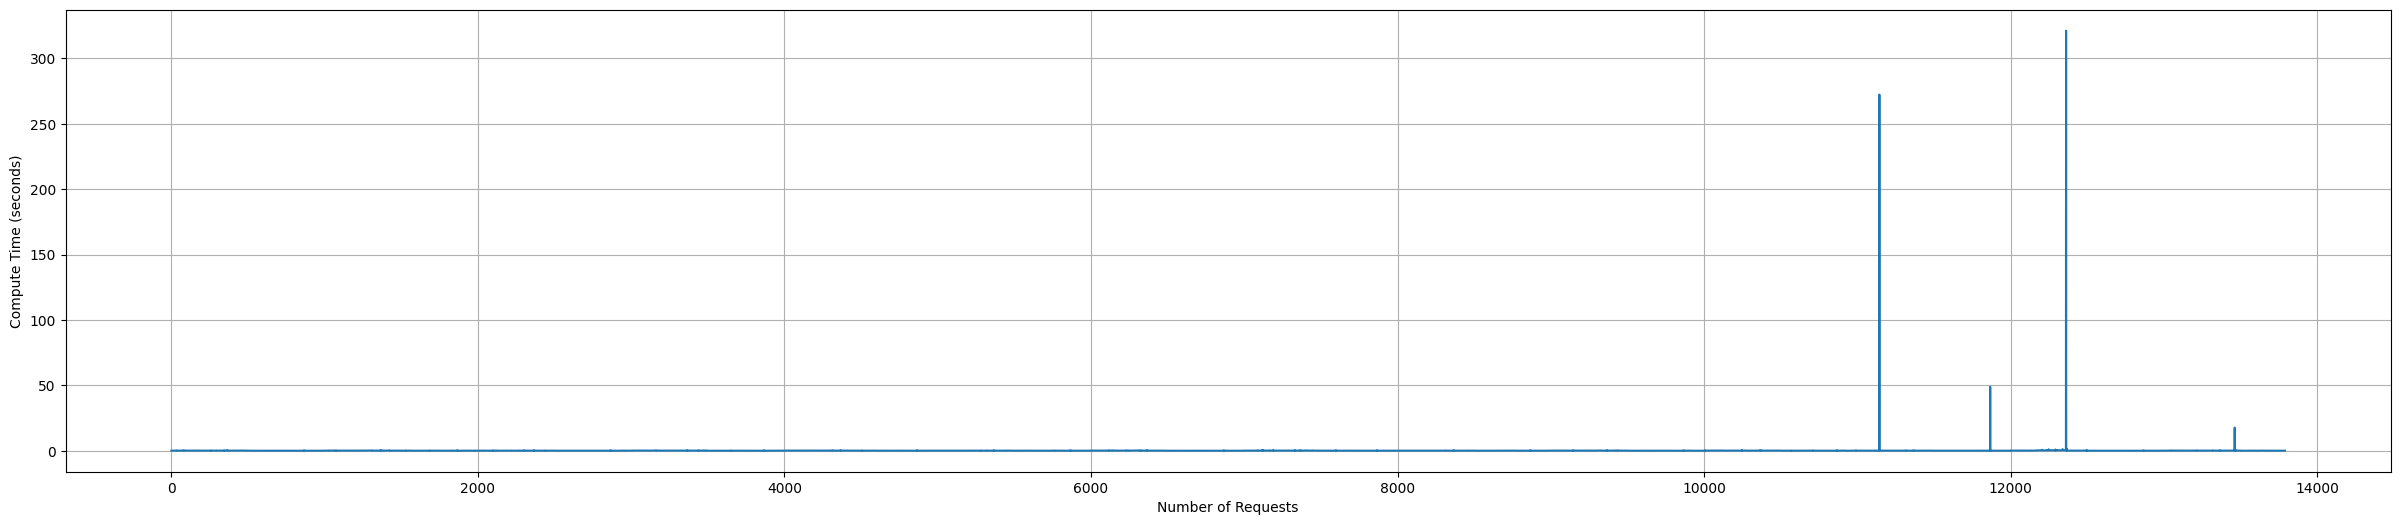

In [65]:
plt.figure(figsize=(30, 6))
plt.plot(results['compute_time'])
plt.xlabel('Number of Requests')
plt.ylabel('Compute Time (seconds)')
plt.grid(True)
plt.show()

In [63]:
results['daemon_overhead'] = results['total_time'] - results['compute_time']

summary = results.groupby('model')[['accuracy', 'compute_time', 'daemon_overhead']].mean()
summary.columns = ['Mean Accuracy', 'Mean Compute Time (s)', 'Mean Daemon Overhead (s)']
summary


,Mean Accuracy,Mean Compute Time (s),Mean Daemon Overhead (s)
model,,,
densenet201,0.904000,0.108527,0.001700
googlenet,0.774000,0.041912,0.001693
mobilenet_v3_small,0.836000,0.048438,0.001570
resnet152,0.909955,0.108257,0.001626
resnext50_32x4d,0.926000,0.068354,0.001579
shufflenet_v2_x0_5,0.716094,0.019134,0.001582


In [11]:
power = pd.read_csv('/Users/neeleshkarthikeyan/d2i/cyberinfrastructure-knowledge-network/plugins/power_monitoring/server/power.csv')
power.columns = ['timestamp', 'container_power', 'container_cpu_usage', 'container_memory_usage', 'cpu_power', 'gpu_power', 'tot_power']

# Convert timestamp to datetime
power['timestamp'] = pd.to_datetime(power['timestamp'])
power

,timestamp,container_power,container_cpu_usage,container_memory_usage,cpu_power,gpu_power,tot_power
0,2024-09-28 20:19:18,127458.00,97.00,223241830,1314,123,3204
1,2024-09-28 20:19:22,50970.01,49.63,357249843,1027,246,2958
2,2024-09-28 20:19:27,114321.50,99.41,476472934,1150,41,2880
3,2024-09-28 20:19:32,138760.65,71.05,477102080,1953,40,3709
4,2024-09-28 20:19:37,109211.76,55.92,761790464,1953,81,3785
...,...,...,...,...,...,...,...
13480,2024-09-29 13:48:40,14354.78,18.38,469028044,781,41,2390
13481,2024-09-29 13:48:45,51684.40,62.80,559415296,823,41,2469
13482,2024-09-29 13:48:49,237.39,0.41,563399884,579,0,2111
13483,2024-09-29 13:48:54,334.66,0.58,561512448,577,206,2435


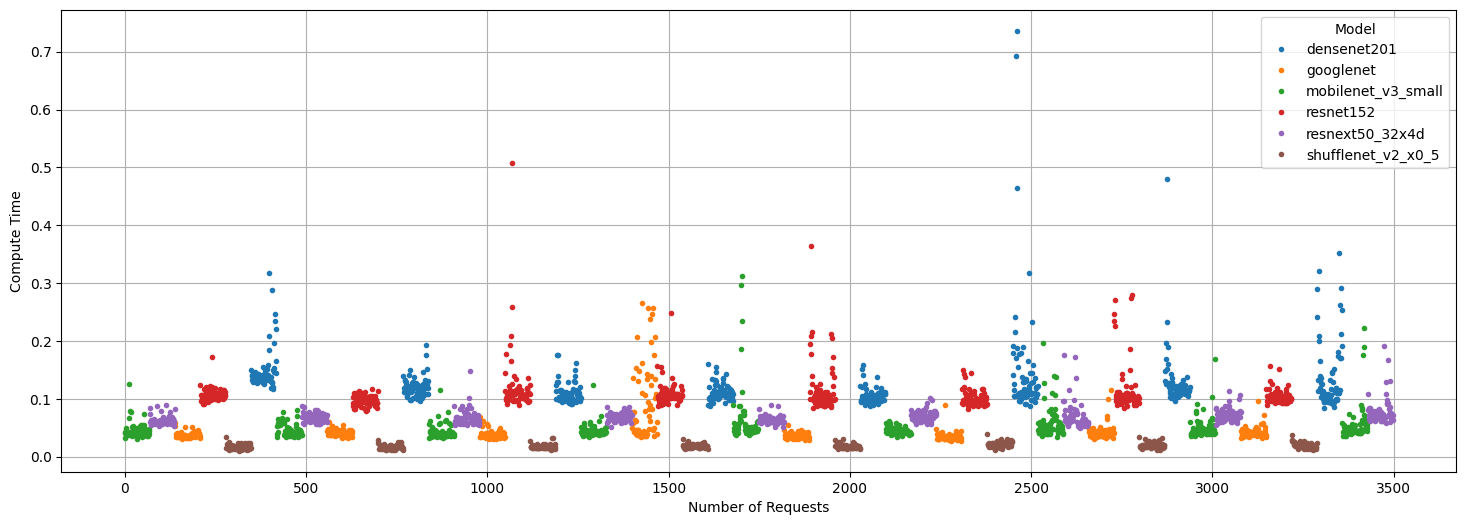

In [4]:

# Plot the data with different colors for each model
plt.figure(figsize=(18, 6))

# Group by model and plot each group separately
for model, group in results.groupby('model'):
    plt.plot(group['compute_time'], marker='.', linestyle='', label=model)

plt.xlabel('Number of Requests')
plt.ylabel('Compute Time')

plt.grid(True)
plt.legend(title='Model')
plt.show()

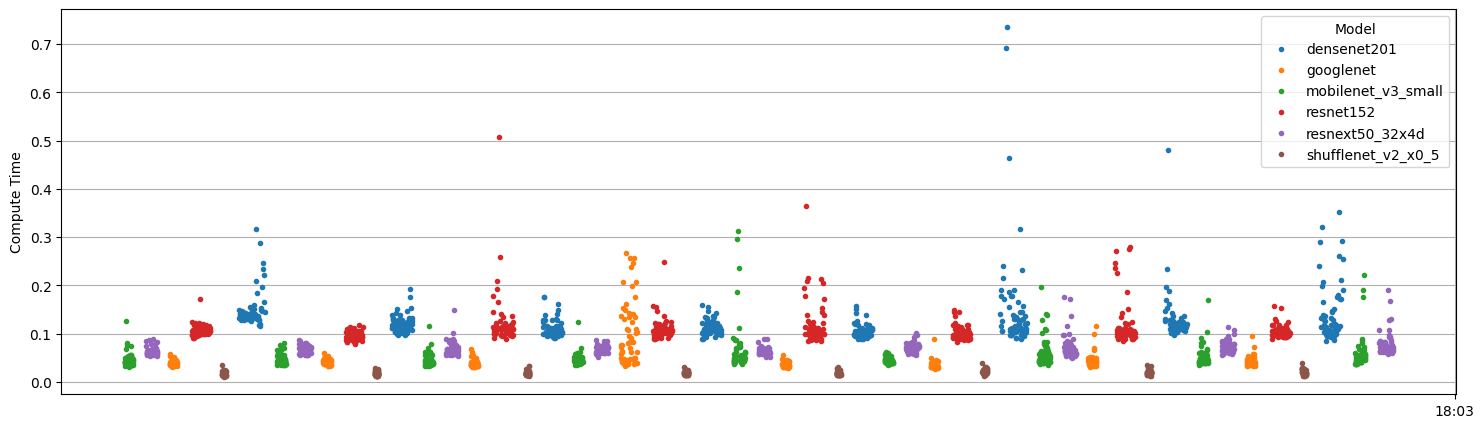

In [5]:
# Define the model mapping
model_mapping = {
    "550e8400-e29b-41d4-a716-446655440000": "resnet152",
    "550e8400-e29b-41d4-a716-446655440001": "shufflenet_v2_x0_5",
    "550e8400-e29b-41d4-a716-446655440002": "densenet201",
    "550e8400-e29b-41d4-a716-446655440003": "mobilenet_v3_small",
    "550e8400-e29b-41d4-a716-446655440004": "resnext50_32x4d",
    "550e8400-e29b-41d4-a716-446655440005": "googlenet"
}

# Replace model IDs with names
results['model'] = results['model'].replace(model_mapping)

# Plot the data with different colors for each model
plt.figure(figsize=(18, 5))

# Group by model and plot each group separately
for model, group in results.groupby('model'):
    plt.plot(group['timestamp'], group['compute_time'], marker='.', linestyle='', label=model)

plt.ylabel('Compute Time')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
plt.grid(True)
plt.legend(title='Model')
plt.show()

In [8]:
power

,timestamp,container_power,container_cpu_usage,container_memory_usage,cpu_power,gpu_power,tot_power
0,2024-09-28 20:19:18,127458.00,97.00,223241830,1314,123,3204
1,2024-09-28 20:19:22,50970.01,49.63,357249843,1027,246,2958
2,2024-09-28 20:19:27,114321.50,99.41,476472934,1150,41,2880
3,2024-09-28 20:19:32,138760.65,71.05,477102080,1953,40,3709
4,2024-09-28 20:19:37,109211.76,55.92,761790464,1953,81,3785
...,...,...,...,...,...,...,...
4995,2024-09-29 02:47:46,70.68,0.57,781398835,124,41,1744
4996,2024-09-29 02:47:51,101.43,0.49,781818265,207,124,2070
4997,2024-09-29 02:47:56,119.52,0.72,781084262,166,82,1949
4998,2024-09-29 02:48:00,60.76,0.49,781608550,124,82,1783


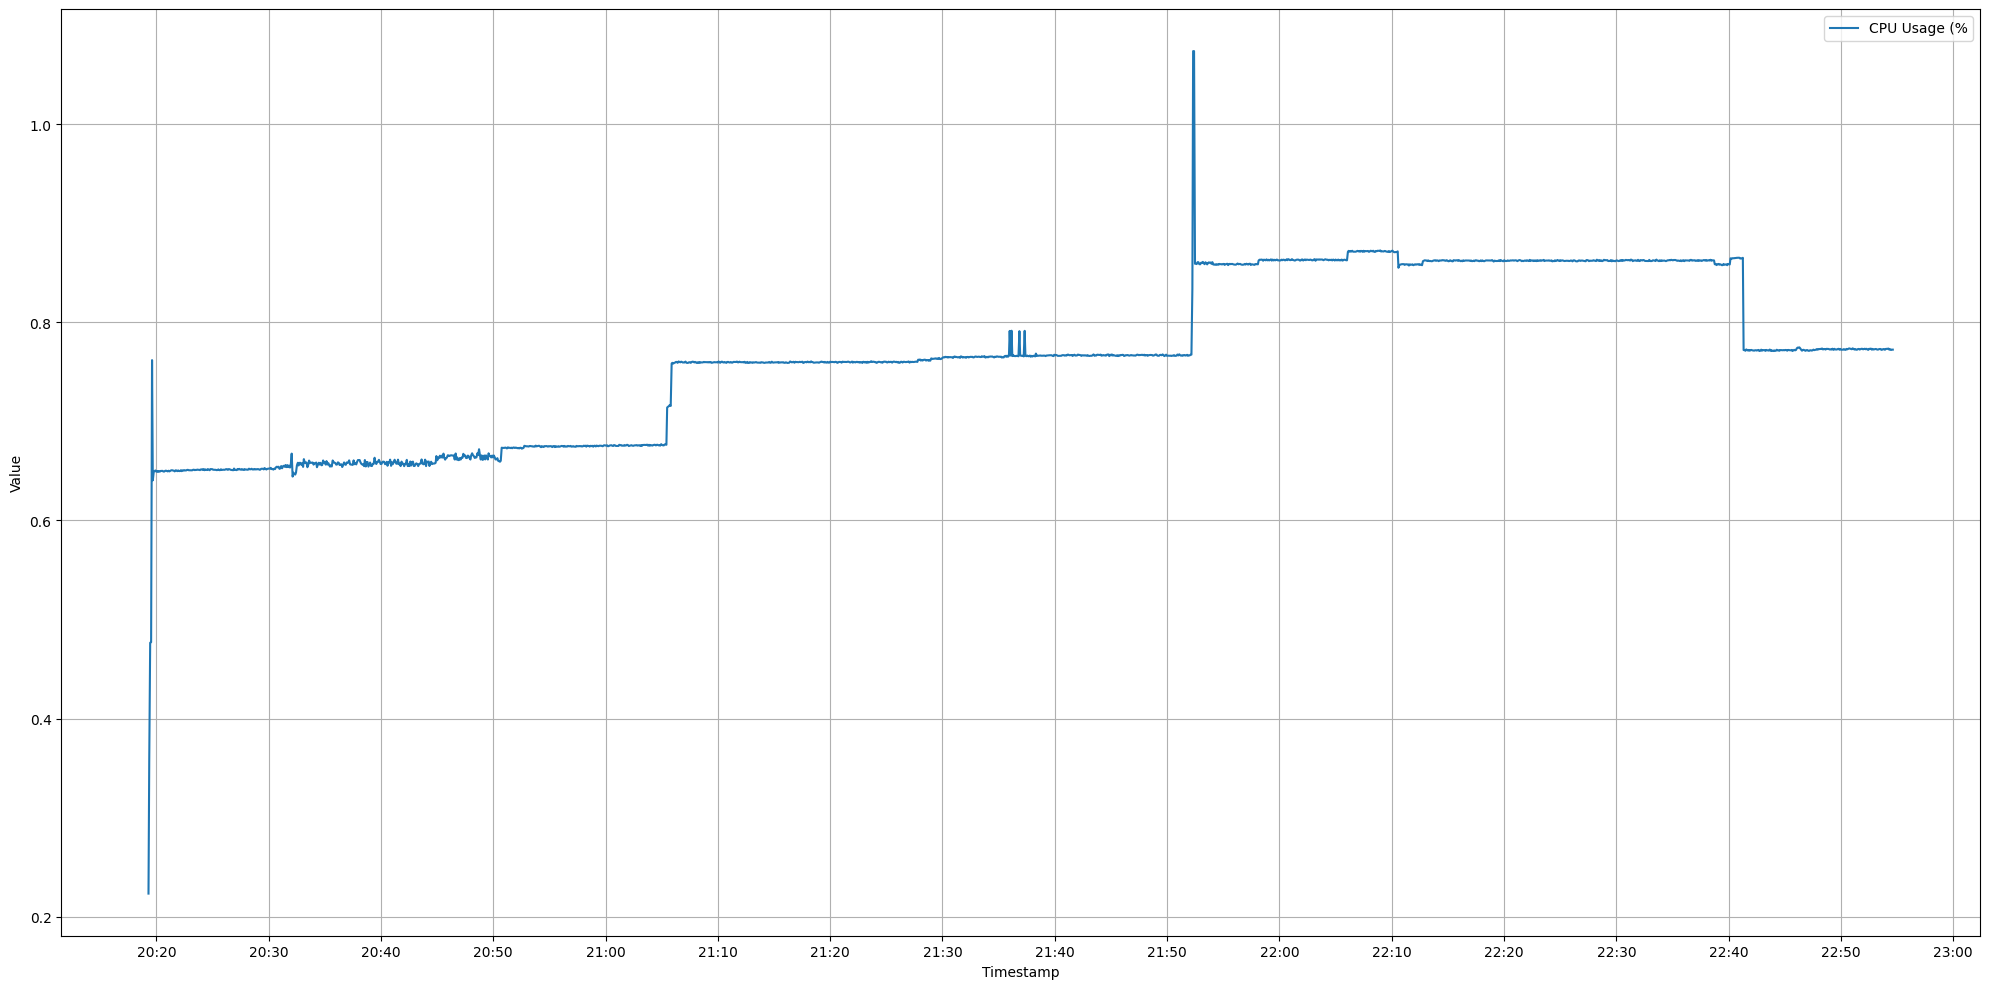

In [16]:
# Plot the data

power = power[:2000]

plt.style.use('default')
plt.figure(figsize=(20, 10), facecolor='white')
# plt.plot(results['timestamp'], results['compute_time'], label='Compute Time (s)')
plt.plot(power['timestamp'], power['container_memory_usage']/1e9, label='CPU Usage (%')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
plt.tight_layout()
plt.show()

In [35]:
results.groupby('model')['accuracy'].mean()

model
densenet201           0.914286
googlenet             0.657143
mobilenet_v3_small    0.828151
resnet152             0.885714
resnext50_32x4d       0.942857
shufflenet_v2_x0_5    0.685714
Name: accuracy, dtype: float64